In [1]:
using DataFrames
using Pipe
using PyPlot
using Random
using Statistics

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/dsatterthwaite/.julia/packages/PyPlot/XaELc/src/init.jl:198


In [2]:
function sim_e()
    draw = Float64[]
    while true
        push!(draw, rand())
        sum(draw) > 1.0 && return draw
    end
end

sim_e (generic function with 1 method)

In [3]:
Random.seed!(4321);

In [4]:
res = [sim_e() for _ in 1:5]

5-element Array{Array{Float64,1},1}:
 [0.1619496289112512, 0.1385032717390522, 0.6355055732000539, 0.36326986232801595]
 [0.3700559311804976, 0.8332539255123794]
 [0.6910169607353331, 0.08205602210008567, 0.6441883306325207]
 [0.8730445160270877, 0.7056394561629349]
 [0.5280168598206405, 0.41389471780482423, 0.49228887505845575]

In [5]:
sum.(res)

5-element Array{Float64,1}:
 1.2992283361783732
 1.203309856692877
 1.4172613134679395
 1.5786839721900225
 1.4342004526839205

In [6]:
@. sum(res) - last(res)

5-element Array{Float64,1}:
 0.9359584738503572
 0.3700559311804976
 0.7730729828354188
 0.8730445160270877
 0.9419115776254647

In [7]:
df = DataFrame()
@time for i in 1:10^7
    push!(df, (id=i, pos=sim_e()))
end

  8.378827 seconds (131.34 M allocations: 4.442 GiB, 30.85% gc time)


In [8]:
first(df, 5)

,id,pos
,Int64,Array…
1,1,"[0.24885, 0.0578154, 0.914811]"
2,2,"[0.917523, 0.55376]"
3,3,"[0.544223, 0.478742]"
4,4,"[0.192376, 0.557935, 0.0327349, 0.729883]"
5,5,"[0.564001, 0.192151, 0.714871]"


In [9]:
transform!(df, :pos => ByRow(length) => :nsamples)

,id,pos,nsamples
,Int64,Array…,Int64
1,1,"[0.24885, 0.0578154, 0.914811]",3
2,2,"[0.917523, 0.55376]",2
3,3,"[0.544223, 0.478742]",2
4,4,"[0.192376, 0.557935, 0.0327349, 0.729883]",4
5,5,"[0.564001, 0.192151, 0.714871]",3
6,6,"[0.551949, 0.286209, 0.698777]",3
7,7,"[0.729513, 0.891781]",2
8,8,"[0.310581, 0.192523, 0.728135]",3
9,9,"[0.684975, 0.738706]",2


In [10]:
mean(df.nsamples)

2.7181168

In [11]:
combine(df, :nsamples => mean)

,nsamples_mean
,Float64
1,2.71812


In [12]:
MathConstants.e

ℯ = 2.7182818284590...

In [13]:
samps_agg = @pipe df |>
    groupby(_, :nsamples, sort=true) |>
    combine(_, :nsamples => length)

,nsamples,nsamples_length
,Int64,Int64
1,2,5001303
2,3,3333296
3,4,1248393
4,5,333226
5,6,69749
6,7,12047
7,8,1753
8,9,207
9,10,24


In [16]:
transform!(samps_agg,
           :nsamples_length => (x -> x ./ sum(x)) => :simulation,
           :nsamples => ByRow(x -> (x - 1) / factorial(x)) => :theory)

,nsamples,nsamples_length,simulation,theory
,Int64,Int64,Float64,Float64
1,2,5001303,0.50013,0.5
2,3,3333296,0.33333,0.333333
3,4,1248393,0.124839,0.125
4,5,333226,0.0333226,0.0333333
5,6,69749,0.0069749,0.00694444
6,7,12047,0.0012047,0.00119048
7,8,1753,0.0001753,0.000173611
8,9,207,2.07e-5,2.20459e-5
9,10,24,2.4e-6,2.48016e-6


In [17]:
first(df, 5)

,id,pos,nsamples
,Int64,Array…,Int64
1,1,"[0.24885, 0.0578154, 0.914811]",3
2,2,"[0.917523, 0.55376]",2
3,3,"[0.544223, 0.478742]",2
4,4,"[0.192376, 0.557935, 0.0327349, 0.729883]",4
5,5,"[0.564001, 0.192151, 0.714871]",3


In [18]:
dftest = select(
    df, :pos => ByRow(first) => :first, :pos => ByRow(last) => :last)

,first,last
,Float64,Float64
1,0.24885,0.914811
2,0.917523,0.55376
3,0.544223,0.478742
4,0.192376,0.729883
5,0.564001,0.714871
6,0.551949,0.698777
7,0.729513,0.891781
8,0.310581,0.728135
9,0.684975,0.738706


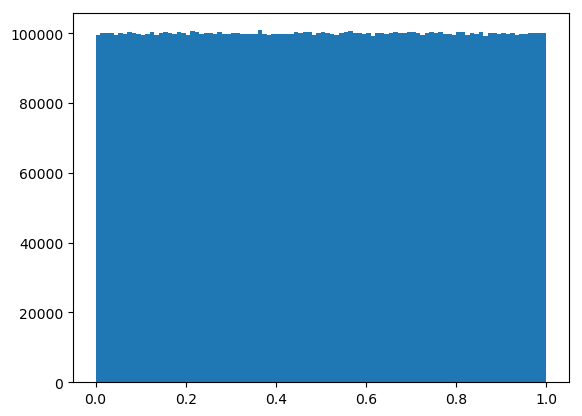

In [19]:
hist(dftest.first, 100);

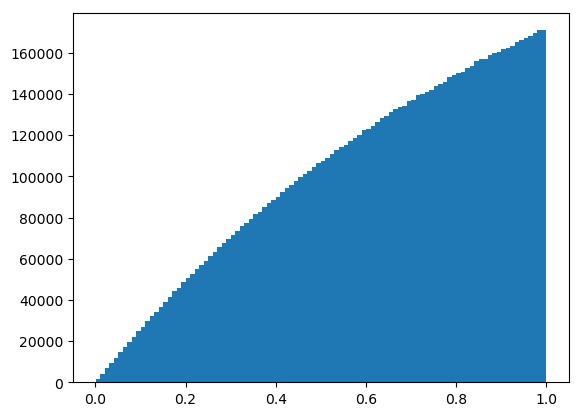

In [21]:
hist(dftest.last, 100);